### Beispiel Adaline
Lernen der Trennflächenfunktion des Linearklassifikators mit dem Gradientenverfahren

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import functions.sda_help as sh

Populating the interactive namespace from numpy and matplotlib


### Dateneingabe 1
Daten, Klassenbezeichnungen und Trennflächenparameter eingeben

In [2]:
k = np.array([[2.0, 1.0, 0.5, 0.0] , [4.0, 0.5, 1.5, 0.5]])
kn = [1, 1, -1, -1]
w = np.array([-0.3, 1.0, 0.0])

Dataframe erzeugen

In [3]:
df = pd.DataFrame(np.transpose(k), columns=['x1', 'x2'])
dfk = pd.DataFrame(np.transpose(kn), columns=['Klasse'])
df_ges = pd.concat([df, dfk], axis = 1)

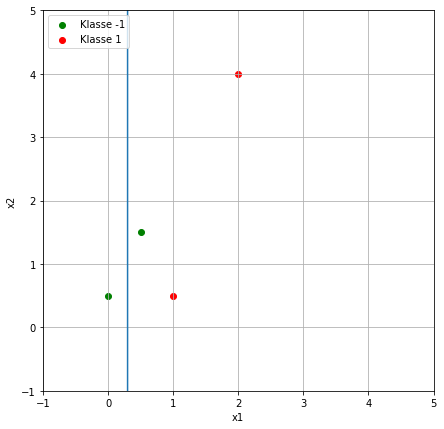

In [4]:
sh.show_res(df_ges, w)

### schrittweise Änderung
Datenpunkt, Klasse und Lernkonstante für Berechnung der neuen Trennfläche eingeben

In [5]:
d_korr = [0.5, 1.5]
cl = -1
alpha = 0.1

In [6]:
d_korr = np.append(1, d_korr)
w = w - 2 * alpha * d_korr * (np.dot(d_korr, w) - cl)
print(w)

[-0.54  0.88 -0.36]


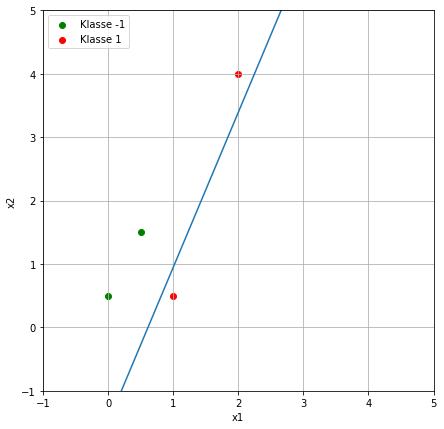

In [7]:
sh.show_res(df_ges, w)

### Iterative Berechnung:

Lernkonstante und Anzahl der Iterationen eingeben

In [8]:
alpha = 0.01
n_iter = 2000

In [9]:
for i in range(0, n_iter):
    err = 0
    #print(i)
    for d in range(0, len(df_ges)):
        df_h = df_ges.values[d,0:2]
        df_h = np.append(1, df_h)
        #print('Datenpunkt: ', df_h)
        e = np.sign(np.dot(df_h, w)) - df_ges.values[d,2]
        if e != 0:
            err = err + 1
            w = w - 2 * alpha * df_h * (np.dot(df_h, w) - df_ges.values[d,2])
            w[1] = w[1]/w[2]
            w[2] = 1
            #print('Parametervektor: ', w)
    if err == 0:
        print('Iterationen bis Konvergenz: ', i)
        break      

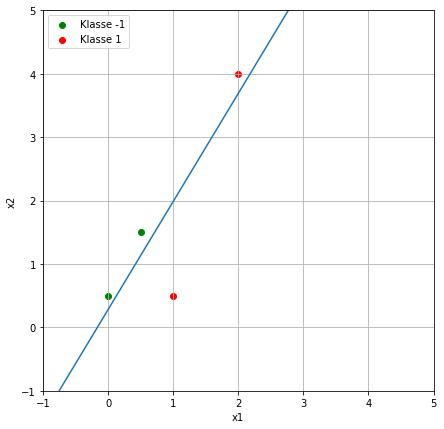

In [10]:
sh.show_res(df_ges, w)

### Dateneingabe 2

In [12]:
df_name = 'df_perz.txt'
df = pd.read_pickle('data/' + df_name)

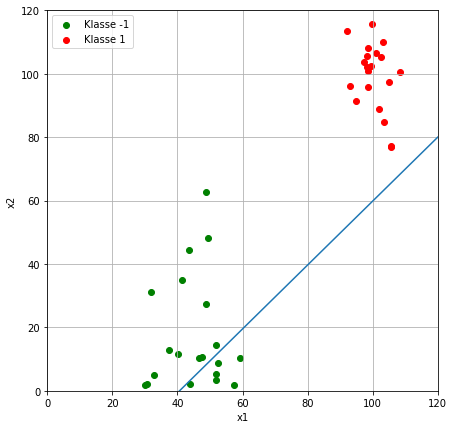

In [13]:
w = np.array([-40.0, 1.0, -1.0])
sh.show_res1(df, w)

In [14]:
alpha = 0.2
n_iter = 200

In [15]:
for i in range(0, n_iter):
    err = 0
    for d in range(0, len(df)):
        df_h = df.values[d,0:2]
        df_h = np.append(1, df_h)
        #print('Datenpunkt: ', df_h)
        e = np.sign(np.dot(df_h, w)) - df.values[d,2]
        if e != 0:
            err = err + 1
            w = w - 2 * alpha * df_h * (np.dot(df_h, w) - df.values[d,2])
            w[1] = w[1]/w[2]
            w[2] = 1
            print('Parametervektor: ', w)
    if err == 0:
        print('Iterationen bis Konvergenz: ', i)
        break

Parametervektor:  [-46.63670496  28.70016876   1.        ]
Parametervektor:  [-625.58528606    9.58708796    1.        ]
Iterationen bis Konvergenz:  1


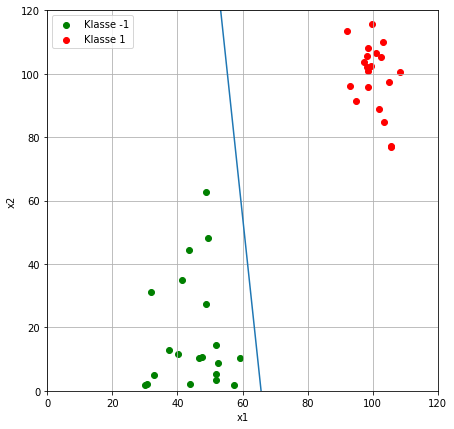

In [16]:
sh.show_res1(df, w)